# Libraries and data import

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

data = load_wine()

In [125]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [126]:
# assigning X and y
X = data.data.astype(np.float32) 
y = data.target

# Exploring dataset

class_0: 59
class_1: 71
class_2: 48


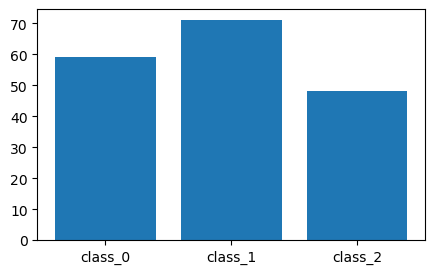

In [127]:
# classes are quite well distributed
_, class_count = np.unique(y, return_counts=True)
for class_name, class_qty in zip(data.target_names, class_count):
    print(f"{class_name}: {class_qty}")

fig = plt.figure(figsize=(5,3))
plt.bar(data.target_names, class_count);

In [128]:
# basic statistics
dfX = pd.DataFrame(data=X, columns=data.feature_names)
dfX.describe().round(1).transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.0,0.8,11.0,12.4,13.1,13.7,14.8
malic_acid,178.0,2.3,1.1,0.7,1.6,1.9,3.1,5.8
ash,178.0,2.4,0.3,1.4,2.2,2.4,2.6,3.2
alcalinity_of_ash,178.0,19.5,3.3,10.6,17.2,19.5,21.5,30.0
magnesium,178.0,99.7,14.3,70.0,88.0,98.0,107.0,162.0
total_phenols,178.0,2.3,0.6,1.0,1.7,2.4,2.8,3.9
flavanoids,178.0,2.0,1.0,0.3,1.2,2.1,2.9,5.1
nonflavanoid_phenols,178.0,0.4,0.1,0.1,0.3,0.3,0.4,0.7
proanthocyanins,178.0,1.6,0.6,0.4,1.2,1.6,2.0,3.6
color_intensity,178.0,5.1,2.3,1.3,3.2,4.7,6.2,13.0


In [129]:
# creating dataframe containing features, target and column names
df = dfX
df["target"] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float32
 1   malic_acid                    178 non-null    float32
 2   ash                           178 non-null    float32
 3   alcalinity_of_ash             178 non-null    float32
 4   magnesium                     178 non-null    float32
 5   total_phenols                 178 non-null    float32
 6   flavanoids                    178 non-null    float32
 7   nonflavanoid_phenols          178 non-null    float32
 8   proanthocyanins               178 non-null    float32
 9   color_intensity               178 non-null    float32
 10  hue                           178 non-null    float32
 11  od280/od315_of_diluted_wines  178 non-null    float32
 12  proline                       178 non-null    float32
 13  targe

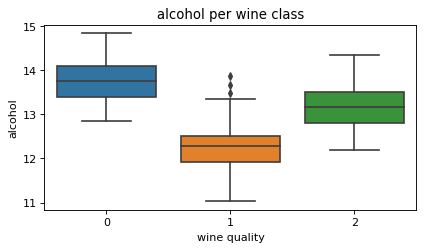

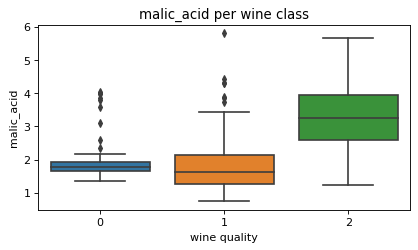

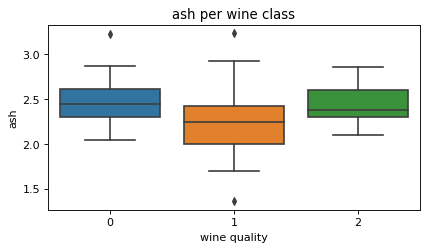

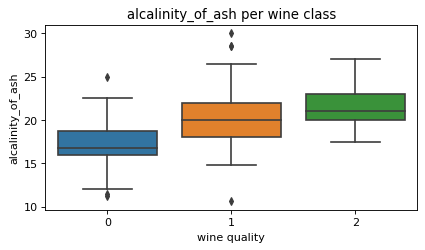

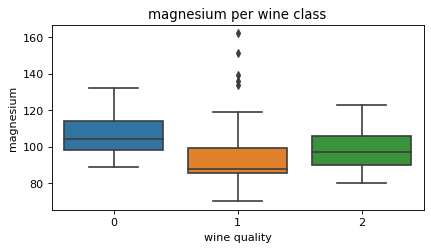

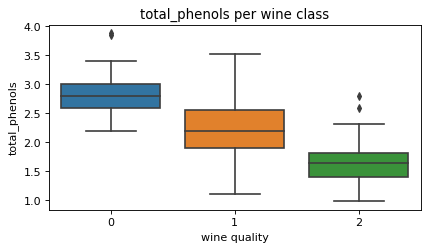

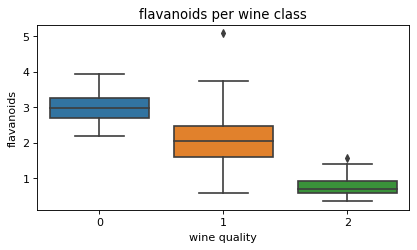

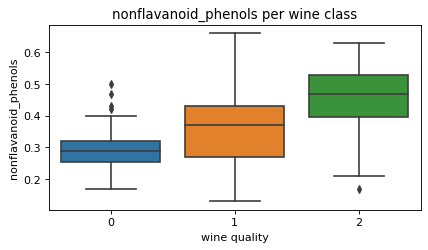

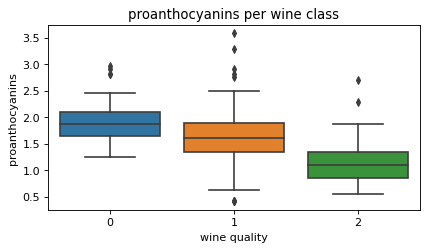

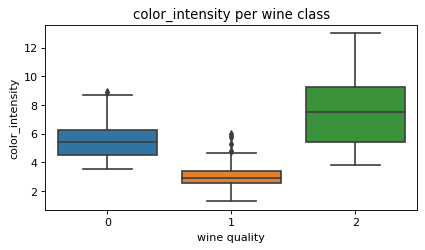

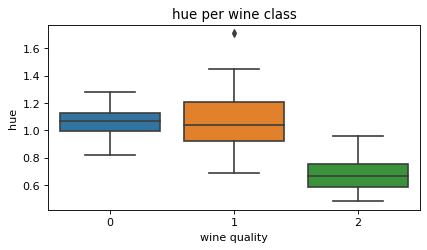

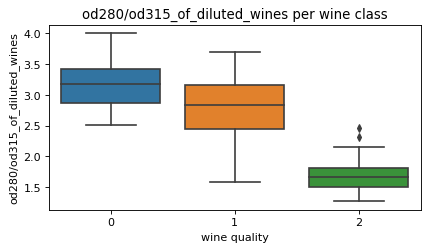

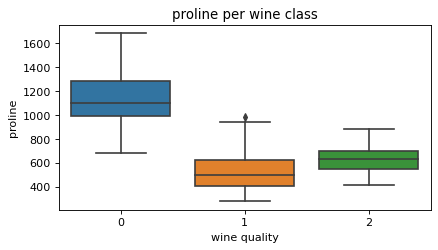

In [130]:
# exploring boxplots per class of wine
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 3), dpi=80)
    sns.boxplot(x="target", y=column, data=df)
    plt.title(f"{column} per wine class")
    plt.xlabel("wine quality");
    

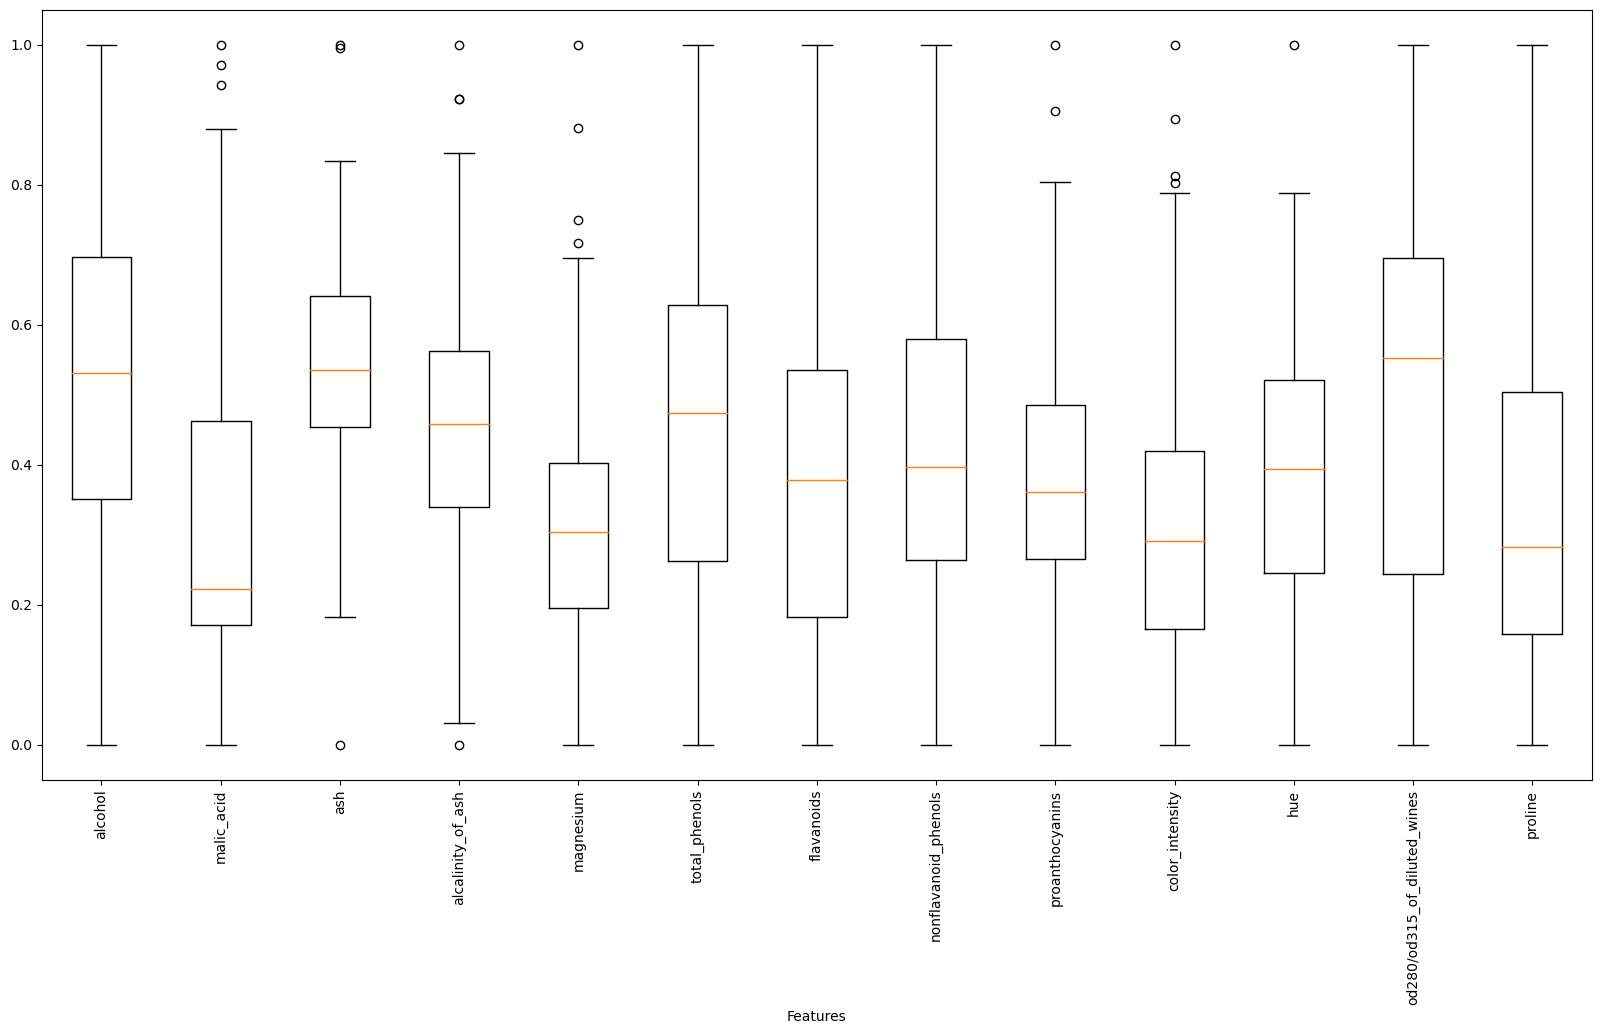

In [131]:
# boxplots of normalized data
X_min_max = MinMaxScaler().fit_transform(X)
fig = plt.figure(figsize=(20,10))
plt.boxplot(X_min_max, labels=data.feature_names)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.show()

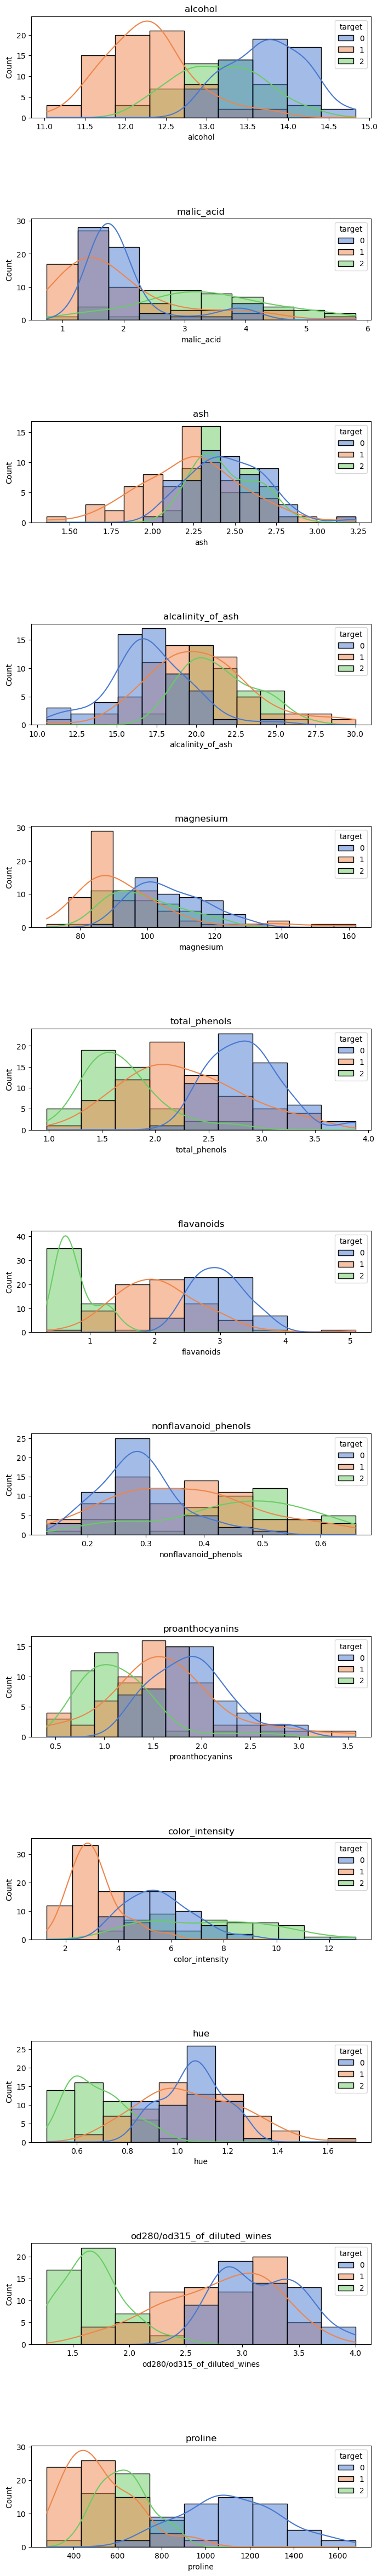

In [132]:
# exploring feature distribution per class of wine
fig, axes  = plt.subplots(13, 1, figsize=(8, 60))
plt.subplots_adjust(hspace=1)
palette="muted"

for i in range(13):
    sns.histplot(df, x=df.iloc[:, i], kde=True, hue=df['target'], ax=axes[i], palette=palette)
    axes[i].set_title(df.columns[i])
    
plt.show()

# Creating a model function with 1 hidden layer

In [133]:
# function that creates a model with 1 hidden layer
def create_model(neurons_qty:int,
                 activation_function:str,
                 number_of_features:int,
                 number_of_classes:int):
    
    model = tf.keras.Sequential()
    
    model.add(layers.InputLayer(input_shape=number_of_features))
    model.add(layers.Dense(units=neurons_qty, activation=activation_function, name="hide"))
    model.add(layers.Dense(units=number_of_classes, name="out"))
    model.add(layers.Softmax())
        
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
       
    return model

# Split data into training and test

In [134]:
# preparing y for modelling
y = y.reshape(-1, 1)
y = OneHotEncoder(sparse=False).fit_transform(y)
y = y.astype(np.float32)

In [135]:
# split to training and test
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=45, stratify=y)

In [136]:
# printing shape
print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (142, 13) (142, 3)
Test data: (36, 13) (36, 3)


# Creation and validation default model with 1 hidden layer

In [137]:
# default variables
batch_default = 10
epochs_default = 10
neurons_deafult = 10

In [138]:
# creating model instance
model = create_model(neurons_qty=neurons_deafult,
                     activation_function="relu",
                     number_of_features=len(data.feature_names),
                     number_of_classes=len(df.target.unique()))

In [139]:
# fit the training data into model
results = model.fit(X_train,
                    y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1)

Epoch 1/10
15/15 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.3310
Epoch 2/10
15/15 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.3380
Epoch 3/10
15/15 [==============================] - 0s 1ms/step - loss: 0.6258 - accuracy: 0.3380
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.3451
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.3803
Epoch 6/10
15/15 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.4014
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.4859
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.5563
Epoch 9/10
15/15 [==============================] - 0s 1ms/step - loss: 0.5762 - accuracy: 0.5986
Epoch 10/10
15/15 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.6056


In [140]:
# printing results
print(classification_report(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1)))

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.88      1.00      0.93        14
           2       0.00      0.00      0.00        10

    accuracy                           0.72        36
   macro avg       0.49      0.67      0.56        36
weighted avg       0.54      0.72      0.61        36



### ***`Observation no 1`***
- Default model of neural network can learn very quickly. Accuracy after 10 epoch is nearly twice as good as accuracy at starting point
- Model couldn't handle class no 2 on test data. This should change while changing parameters

# Accuracy change [default model]

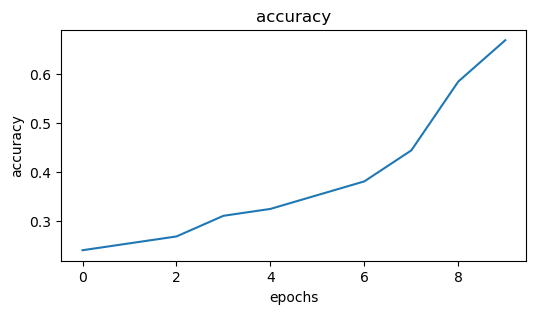

In [105]:
fig=plt.figure(figsize=(6,3))
plt.plot(results.history['accuracy'])
plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy");

### ***`Observation no 2`***
- Accuracy depends heavily on number of epochs. In above case more epochs resulted in higher score
- Caution is needed - too many epoch may lead to overfitting the model

# Loss function change [deafult model]

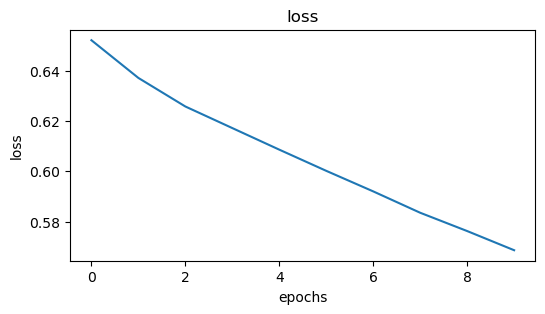

In [141]:
fig=plt.figure(figsize=(6,3))
plt.plot(results.history['loss'])
plt.title("loss")
plt.xlabel("epochs")
plt.ylabel("loss");

### ***`Observation no 3`***
- Loss depends heavily on number of epochs. In above case more epochs resulted in lowe loss
- Caution is needed - too many epoch may lead to overfitting the model

# Changing model parameters [model with 1 hidden layer]

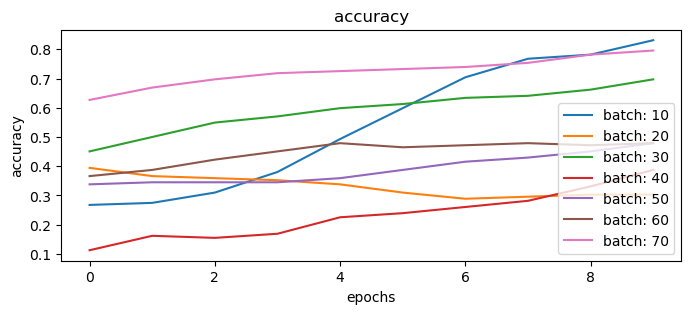

In [142]:
# checking behavior with different batch size
fig=plt.figure(figsize=(8,3))

batch_testing_models = {}
for i in range(10, 70+1, 10):  
    model = create_model(neurons_qty=neurons_deafult,
                         activation_function="relu",
                         number_of_features=len(data.feature_names),
                         number_of_classes=len(df.target.unique()))
    
    results = model.fit(X_train, y_train, batch_size=i, epochs=epochs_default, verbose=0)
    plt.plot(results.history['accuracy'], label=f"batch: {i}")
    

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

In [143]:
# batch == 10 gives best performance
batch_best = 10

### ***`Observation no 4`***
- Higher batch gives better results at the beggining, lower batch gives worse results at the beggining, but may be better with more epochs

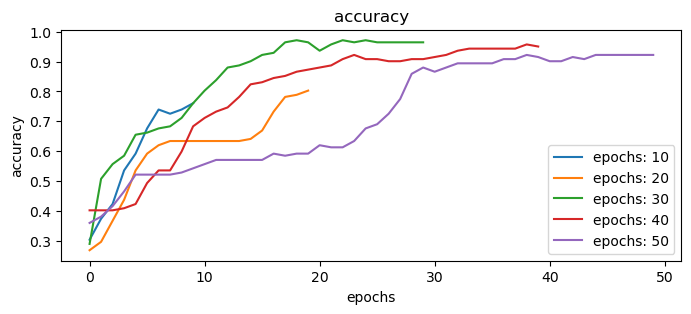

In [144]:
# checking behavior with different epochs size
fig=plt.figure(figsize=(8,3))

batch_testing_models = {}
for i in range(10, 50+1, 10):  
    model = create_model(neurons_qty=neurons_deafult,
                         activation_function="relu",
                         number_of_features=len(data.feature_names),
                         number_of_classes=len(df.target.unique()))
    
    results = model.fit(X_train, y_train, batch_size=batch_default, epochs=i, verbose=0)
    plt.plot(results.history['accuracy'], label=f"epochs: {i}")
    

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

In [145]:
# epochs == 30 gives best performance
epochs_best = 30

### ***`Observation no 5`***
- If model starting point would be at the same spot, then results at 20 epochs should gives similar results
- Model starts in different point and it is important to set optimal epochs number which allow model to perform even if starting point for model is not ideal

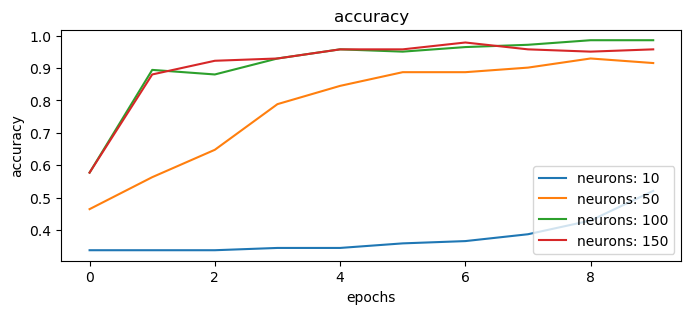

In [146]:
# checking behavior with different neurons qty
# neurons == 150 gives best performance
fig=plt.figure(figsize=(8,3))

batch_testing_models = {}
for i in [10, 50, 100, 150]:  
    model = create_model(neurons_qty=i,
                         activation_function="relu",
                         number_of_features=len(data.feature_names),
                         number_of_classes=len(df.target.unique()))
    
    results = model.fit(X_train, y_train, batch_size=batch_default, epochs=epochs_default, verbose=0)
    plt.plot(results.history['accuracy'], label=f"neurons: {i}")
    

plt.title("accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

In [84]:
# neurons == 100 gives best performance
neurons_best = 100

### ***`Observation no 6`***
- Higher number of neurons allow model to achieve better results
- At the same time higher number of neurons may cause overfitting or decrease of performance
- It is important to set optimal number of neurons

# Best model with 1 hidden layer

2/2 [==============================] - 0s 3ms/step


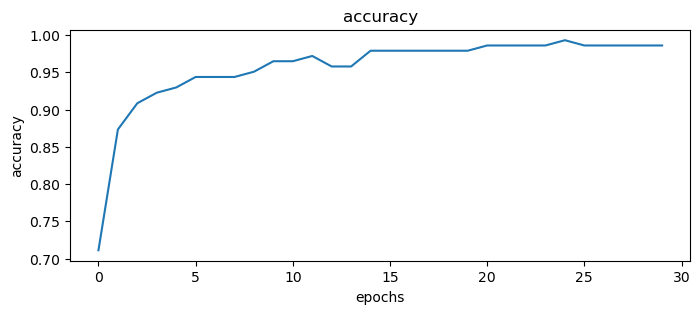

In [147]:
# best model with 1 hidden layer
fig=plt.figure(figsize=(8,3))

model = create_model(neurons_qty=neurons_best,
                     activation_function="relu",
                     number_of_features=len(data.feature_names),
                     number_of_classes=len(df.target.unique()))

results = model.fit(X_train, y_train, batch_size=batch_best, epochs=epochs_best, verbose=0)
plt.plot(results.history['accuracy'])
    

plt.title(f"accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy");

results_test_one_layer = classification_report(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1))

# Creating a model with more hidden layers

In [148]:
# checking behavior if we add more layers to the function
def create_model_2(neurons_qty_layer_1:int,
                   neurons_qty_layer_2:int,
                   neurons_qty_layer_3:int,
                   neurons_qty_layer_4:int,
                   neurons_qty_layer_5:int,
                   activation_function:str,
                   number_of_features:int,
                   number_of_classes:int):
    
    model = tf.keras.Sequential()
    
    model.add(layers.InputLayer(input_shape=number_of_features))
    model.add(layers.Dense(units=neurons_qty_layer_1, activation=activation_function, name="hide1"))
    model.add(layers.Dense(units=neurons_qty_layer_2, activation=activation_function, name="hide2"))
    model.add(layers.Dense(units=neurons_qty_layer_3, activation=activation_function, name="hide3"))
    model.add(layers.Dense(units=neurons_qty_layer_4, activation=activation_function, name="hide4"))
    model.add(layers.Dense(units=neurons_qty_layer_5, activation=activation_function, name="hide5"))
    model.add(layers.Dense(units=number_of_classes, name="out"))
    model.add(layers.Softmax())
        
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
       
    return model

2/2 [==============================] - 0s 2ms/step


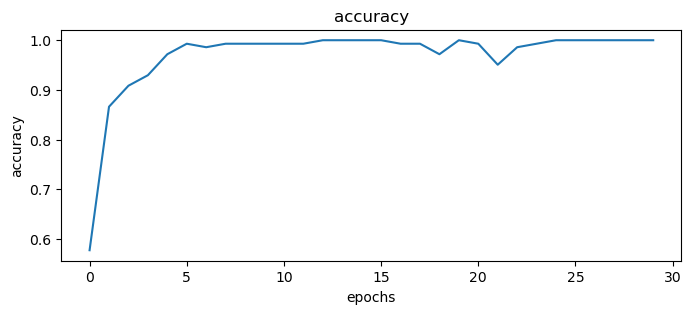

In [149]:
# checking results if we add more layers
fig=plt.figure(figsize=(8,3))

model = create_model_2(neurons_qty_layer_1=neurons_best/5*1,
                       neurons_qty_layer_2=neurons_best/5*2,
                       neurons_qty_layer_3=neurons_best/5*3,
                       neurons_qty_layer_4=neurons_best/5*4,
                       neurons_qty_layer_5=neurons_best/5*5,
                       activation_function="relu",
                       number_of_features=len(data.feature_names),
                       number_of_classes=len(df.target.unique()))

results = model.fit(X_train, y_train, batch_size=batch_best, epochs=epochs_best, verbose=0)
plt.plot(results.history['accuracy'])
    

plt.title(f"accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy");
results_test_more_layers = classification_report(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1))

In [152]:
model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hide1 (Dense)               (None, 30)                420       
                                                                 
 hide2 (Dense)               (None, 60)                1860      
                                                                 
 hide3 (Dense)               (None, 90)                5490      
                                                                 
 hide4 (Dense)               (None, 120)               10920     
                                                                 
 hide5 (Dense)               (None, 150)               18150     
                                                                 
 out (Dense)                 (None, 3)                 453       
                                                                 
 softmax_60 (Softmax)        (None, 3)               

# Compare results Best Model with 1 hidden layer vs Model with more layers

In [150]:
print("Test results of model with 1 hidden layers")
print(results_test_one_layer)

print()
print()

print("Test results of model with more hidden layers")
print(results_test_more_layers)

Test results of model with 1 hidden layers
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      0.93      0.93        14
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



Test results of model with more hidden layers
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



### ***`Observation no 7`***
- Higher number of layers gives very similar results. It may be resulted from the fact, that dataset is very small and adding new layers does not change much <br> 
- Adding more layers to the model add complexity to the model, but sometimes it is not necessary <br>
- Adding more layers may lead to overfitting the model